<a href="https://colab.research.google.com/github/gyyang/neurogym/blob/master/example_NeuroGym_stable_baselines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NeuroGym

NeuroGym is a comprehensive toolkit that allows training any network model on many established neuroscience tasks using Reinforcement Learning techniques. It includes working memory tasks, value-based decision tasks and context-dependent perceptual categorization tasks.
Bellow we show an example in which we trained the A3C algorithm [Mnih et al. 2016 ](https://arxiv.org/abs/1602.01783) on the Random Dots Motion task. The implementation of the A3C algorithm is based on the one explained in [this post](https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-8-asynchronous-actor-critic-agents-a3c-c88f72a5e9f2).

In [0]:
%tensorflow_version 1.x

# Install Gym and NeuroGym

In [2]:
! pip install gym

# Install NeuroGym

In [3]:
! git clone https://github.com/gyyang/neurogym.git

Cloning into 'neurogym'...
remote: Enumerating objects: 489, done.
remote: Counting objects: 100% (489/489), done.
remote: Compressing objects: 100% (299/299), done.
remote: Total 4963 (delta 317), reused 329 (delta 175), pack-reused 4474
Receiving objects: 100% (4963/4963), 3.89 MiB | 5.89 MiB/s, done.
Resolving deltas: 100% (3555/3555), done.


In [4]:
cd neurogym

/content/neurogym


In [5]:
pip install -e .

Obtaining file:///content/neurogym
  Running setup.py develop for neurogym


# Install Stable-Baselines

In [6]:
cd /content

/content


In [7]:
! git clone https://github.com/hill-a/stable-baselines.git

Cloning into 'stable-baselines'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 8970 (delta 23), reused 16 (delta 7), pack-reused 8918
Receiving objects: 100% (8970/8970), 9.56 MiB | 10.42 MiB/s, done.
Resolving deltas: 100% (6744/6744), done.


In [8]:
! apt-get update && apt-get install cmake libopenmpi-dev python3-dev zlib1g-dev

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic/main amd64 Packages [36.8 kB]
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubu

In [9]:
cd stable-baselines/

/content/stable-baselines


In [10]:
pip install --upgrade stable-baselines

     |████████████████████████████████| 235kB 6.2MB/s 
  Found existing installation: stable-baselines 2.2.1
    Uninstalling stable-baselines-2.2.1:
      Successfully uninstalled stable-baselines-2.2.1


# Access tasks info

In [11]:
cd /content/neurogym/

/content/neurogym


In [0]:
from neurogym.meta import tasks_info

In [13]:
tasks_info.info()

### List of environments implemented


* 25 tasks implemented so far.


* Under development, details subject to change


AngleReproduction-v0
AntiReach-v0
Bandit-v0
Combine-v0
DPA-v0
DawTwoStep-v0
DelayedMatchCategory-v0
DelayedMatchSample-v0
DelayedMatchToSampleDistractor1D-v0
DelayedResponse-v0
GNG-v0
GenTask-v0
IntervalDiscrimination-v0
Mante-v0
MatchingPenny-v0
MemoryRecall-v0
MotorTiming-v0
NAltRDM-v0
RDM-v0
Reaching1D-v0
Reaching1DWithSelfDistraction-v0
ReadySetGo-v0
Romo-v0
padoaSch-v0
pdWager-v0



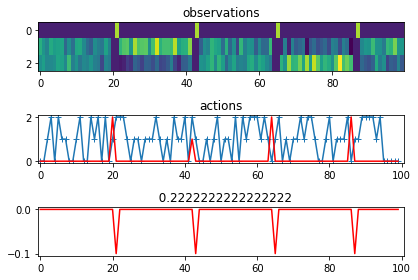

#### RDM

Random dot motion task. Two-alternative forced choice task in which the subject has to integrate two stimuli to decide which one is higher on average

Reference paper: 

[The analysis of visual motion: a comparison of
        neuronal and psychophysical performance](https://www.jneurosci.org/content/12/12/4745)

Default Epoch timing (ms) 

fixation : constant 100

stimulus : constant 2000

decision : constant 100




In [14]:
tasks_info.info('RDM-v0')

# Example

In [0]:
import gym
import neurogym
from neurogym.meta import tasks_info
from stable_baselines.common.policies import LstmPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C  # ACER, PPO2
task = 'RDM-v0'
KWARGS = {'dt': 100, 'timing': {'fixation': ('constant', 200), 'stimulus': ('constant', 500), 'decision': ('constant', 200)}}

env = gym.make('RDM-v0')
# Optional: PPO2 requires a vectorized environment to run
# the env is now wrapped automatically when passing it to the constructor
env = DummyVecEnv([lambda: env])

model = A2C(LstmPolicy, env, verbose=1, policy_kwargs={'feature_extraction':"mlp"})
model.learn(total_timesteps=200000, log_interval=1000)

tasks_info.plot_struct(env, num_steps_env=1000, n_stps_plt=200,
                       model=model, name=task)

env.close()

---------------------------------
| explained_variance | -168     |
| fps                | 18       |
| nupdates           | 1        |
| policy_entropy     | 1.1      |
| total_timesteps    | 5        |
| value_loss         | 3.83e-05 |
---------------------------------
---------------------------------
| explained_variance | -44.8    |
| fps                | 265      |
| nupdates           | 1000     |
| policy_entropy     | 1.1      |
| total_timesteps    | 5000     |
| value_loss         | 0.00166  |
---------------------------------
---------------------------------
| explained_variance | 0.0885   |
| fps                | 269      |
| nupdates           | 2000     |
| policy_entropy     | 1.02     |
| total_timesteps    | 10000    |
| value_loss         | 0.00483  |
---------------------------------
---------------------------------
| explained_variance | -5.45    |
| fps                | 270      |
| nupdates           | 3000     |
| policy_entropy     | 0.911    |
| total_timest